# Student Performance Indicator

## 1. Problem statement

* This project understands how the student's performance, test scores, is affected by other variables such as Gender, Ethnicity, Parental level of eduocation, Lunch and Test preparation course.

## 2. Data Collection

* Dataset Source - kaggle
* The data consists of 8 columns and 1000 rows.

### 2.1 Importing the data and libaries

In [64]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as pd dataFrame

In [65]:
df = pd.read_csv('data/stud.csv')
df.head()                               #this shows the top 5 records of the data set

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [66]:
df.shape            #show the shape of the data set

(1000, 8)

## 3. Dataset information

* gender: male or female
* race/ethnicity: ethnicity of the student -> Group A, B, C, D or E
* parental level of Education: some college; bachelor's degree; master's degree; or associat's degree or high school
* lunch: standard; free/reduced
* test preparation course: complete or not complete before test
* math score
* reading score
* writing score

### 3.1 Data Checks to perform
- Missing values
- Duplicates
- Data types
- The nnumberof unique values of each column
- statistics of data set
- Various categories present in the different categorial column



### 3.2 Checking missing values

In [67]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in this data set

### 3.3 Check data types

In [68]:
df.duplicated().sum()

0

There are no duplicated values in this data set

### 3.4 Check data types

In [69]:
df.info()       #checks null and Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.5 Checking the number of unique values of each column

In [70]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.6 Statistics of the data set

In [71]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight from the above disription of numerical data

- All means are very close to each other -> between 66 and 68.05;
- All standard deviations are also close to each other -> between 14.6 and 15.19;
- While there is a min score of 0 for maths, for writing is much higher with a min score of 10 and a min of 17 for reading

### 3.7 Exploring the data

In [72]:
# this will show us all the types of categories in each char variable

print("Categories in 'gender' variable:                                 ", end = " ")
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable:                         ", end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:            ", end = " ")
print(df['parental_level_of_education'].unique())


print("\nCategories in 'lunch' variable:                                  ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:                ", end = " ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:                                  ['female' 'male']
Categories in 'race ethnicity' variable:                          ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:             ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:                                   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:                 ['none' 'completed']


In [73]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print  columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [74]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [75]:
math_full = df[df['math_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()

print(f'Number of student who scored full marks in Maths: {math_full}')
print(f'Number of student who scored full marks in Readind: {reading_full}')
print(f'Number of student who scored full marks in Writing: {writing_full}')


Number of student who scored full marks in Maths: 7
Number of student who scored full marks in Readind: 17
Number of student who scored full marks in Writing: 14


In [76]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()

print(f'Number of student who score 20 or less in Maths: {math_less_20}')
print(f'Number of student who score 20 or less in Reading: {reading_less_20}')
print(f'Number of student who score 20 or less in Writing: {writing_less_20}')

Number of student who score 20 or less in Maths: 4
Number of student who score 20 or less in Reading: 1
Number of student who score 20 or less in Writing: 3


### Insights
* From the above values we get students who have performed the worst in Maths
* Best performance is in the reading section

## 4. Exploring Data - Visualization

### 4.1 visualize average score distribution to make some conclusion.

* Histogram
* kernel Distribution function (KDE)

### 4.1.1 Histogram and KDE

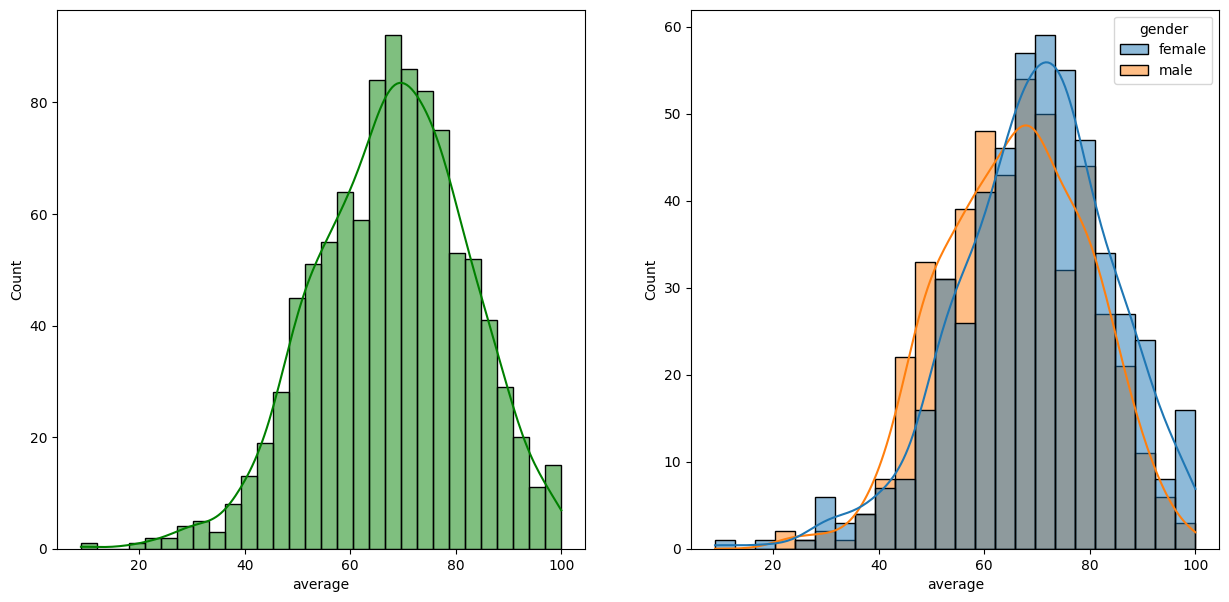

In [77]:
# checking using the average

fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x = 'average', bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',kde=True,hue='gender')
plt.show()

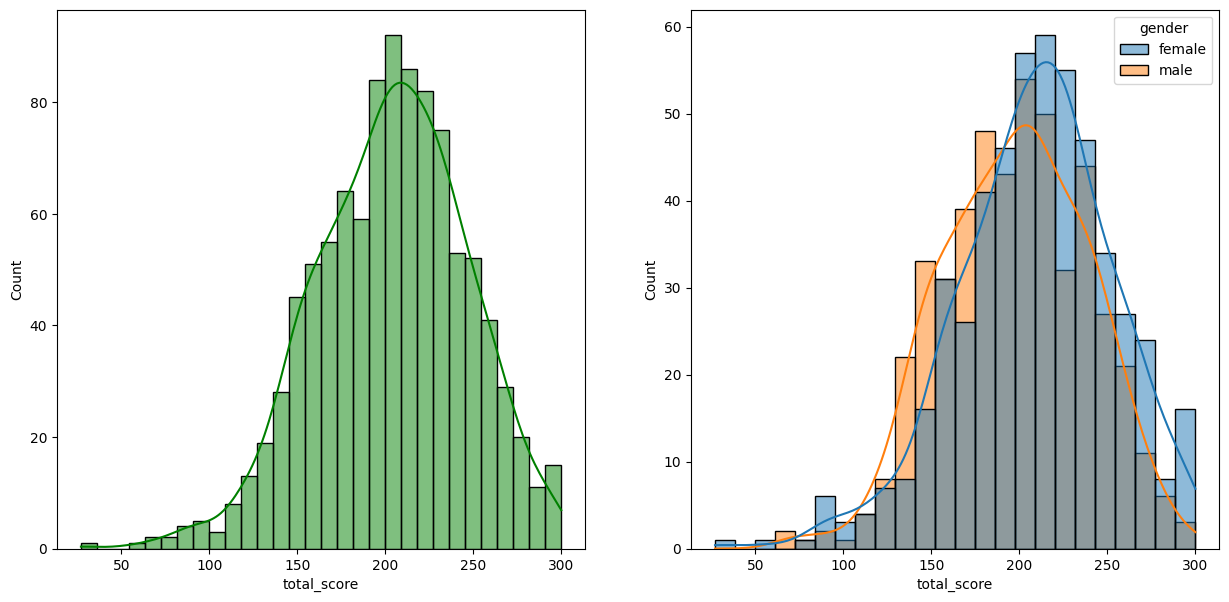

In [78]:
# this is check using the total score

fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x = 'total_score', bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score',kde=True,hue='gender')
plt.show()

### Insights
* Female student tend to perform better then male students

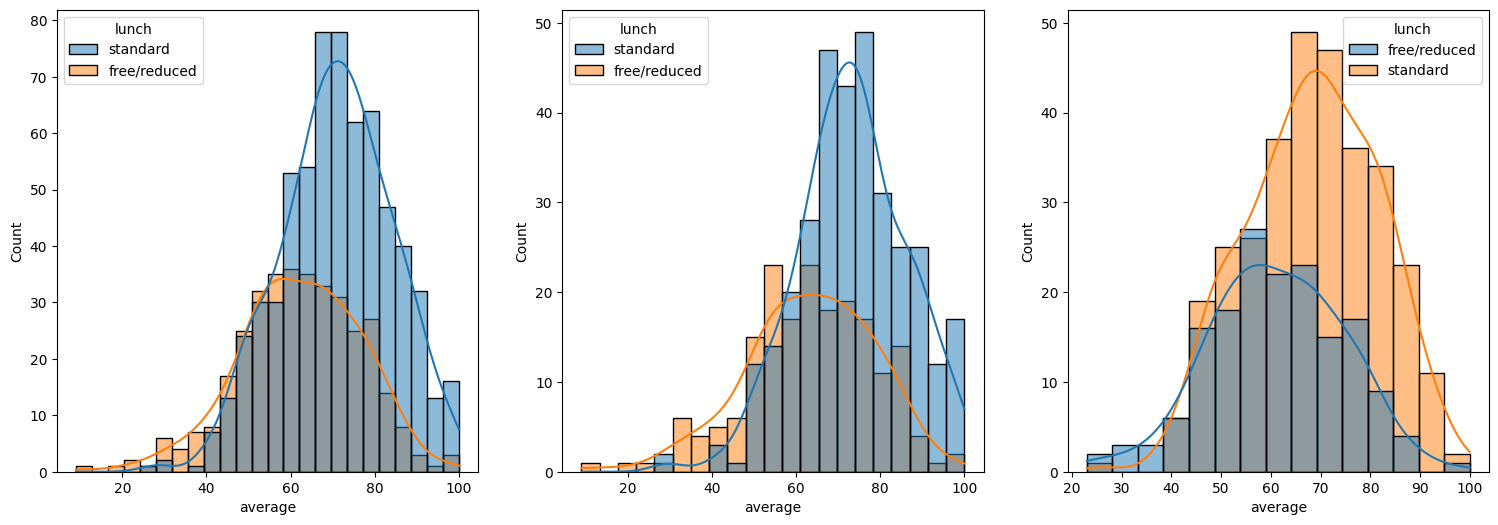

In [79]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### insight
* Standard lunch helps perform well in exams, be it male or female

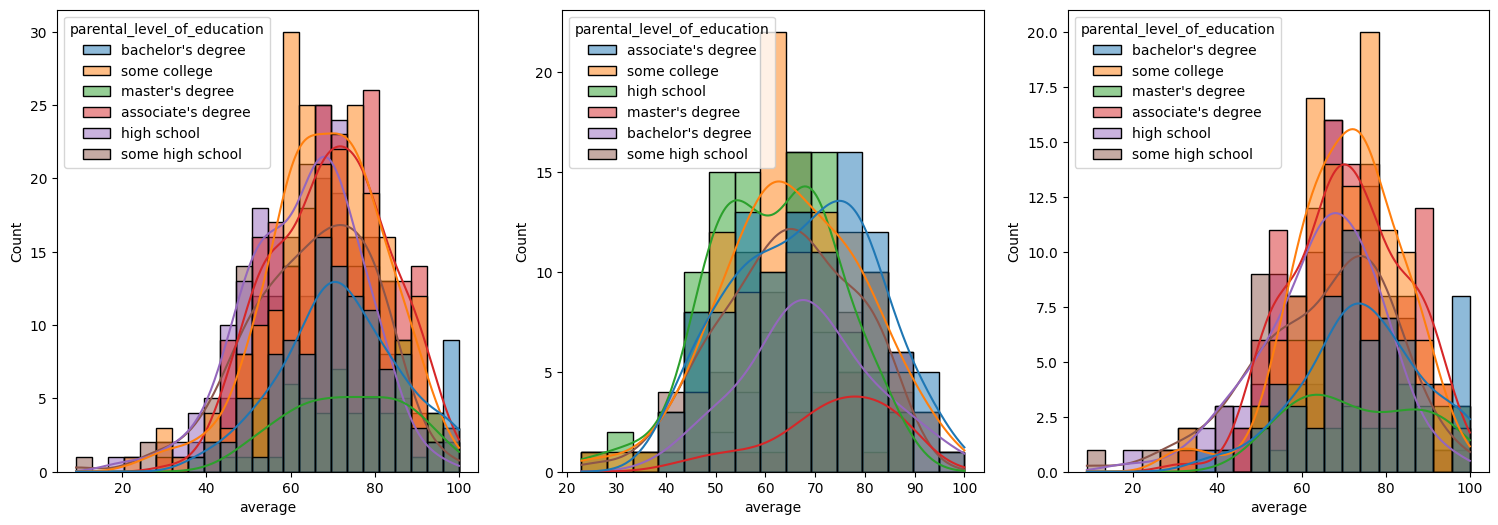

In [80]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'average', kde = True, hue = 'parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == 'female'], x='average', kde = True, hue='parental_level_of_education')
plt.show()

### Insights

* In general parent's education don't help students perform well in exams
* Second plot shows that parents whose education is of associate's degree or masters degree their male child tends to perform well in exams
* Third plot, we see that the parents level of educaion has no effect on the female child

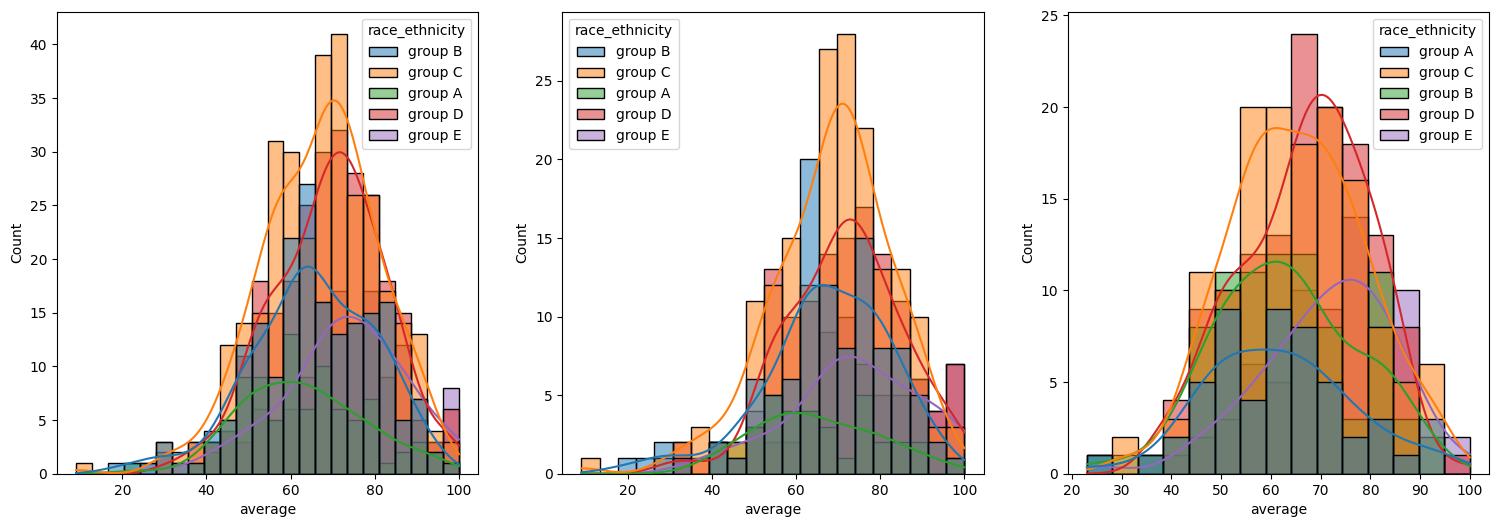

In [81]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x = 'average', kde = True, hue='race_ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender =='female'], x = 'average', kde= True, hue = 'race_ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender =='male'], x='average', kde=True, hue = 'race_ethnicity')
plt.show()

### Insight
* Students of group A and group B tends to perform pooly in exams, irrespective of whether they are male or female
* Student groups C tend to perform good, mostly females

## 4.2 Maximum score of students in all three subjects

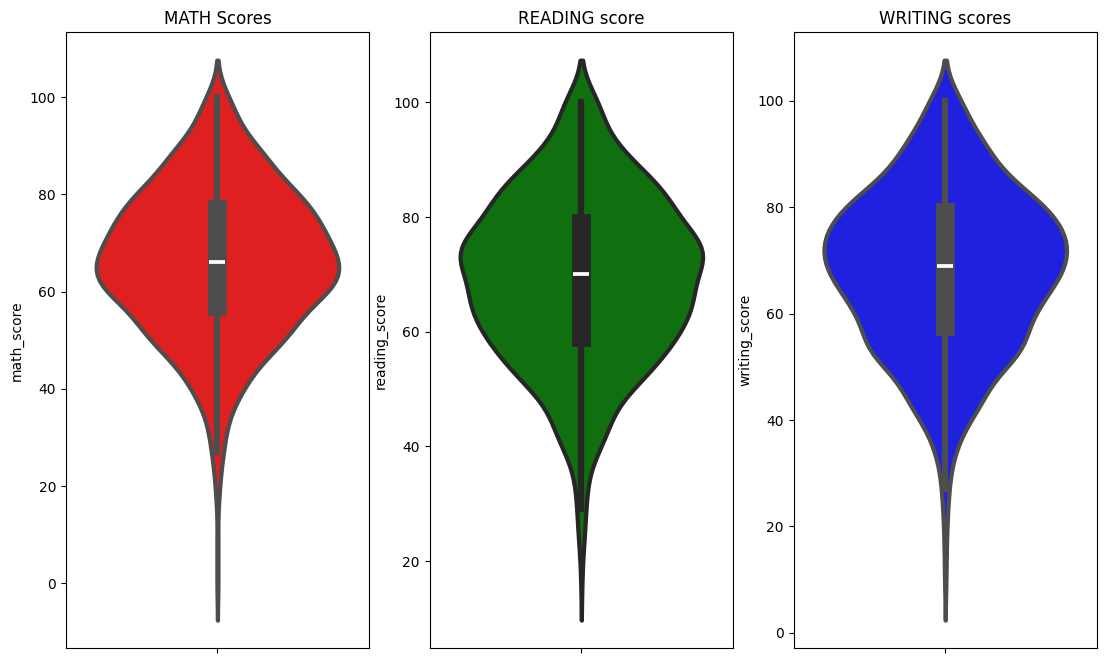

In [82]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH Scores')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING score')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING scores')
sns.violinplot(y='writing_score', data=df, color='blue',linewidth=3)
plt.show()

### Insight
* From the above three plots its clearly visible that most of the student score between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## 4.2 Multivariate analysis using pieplot

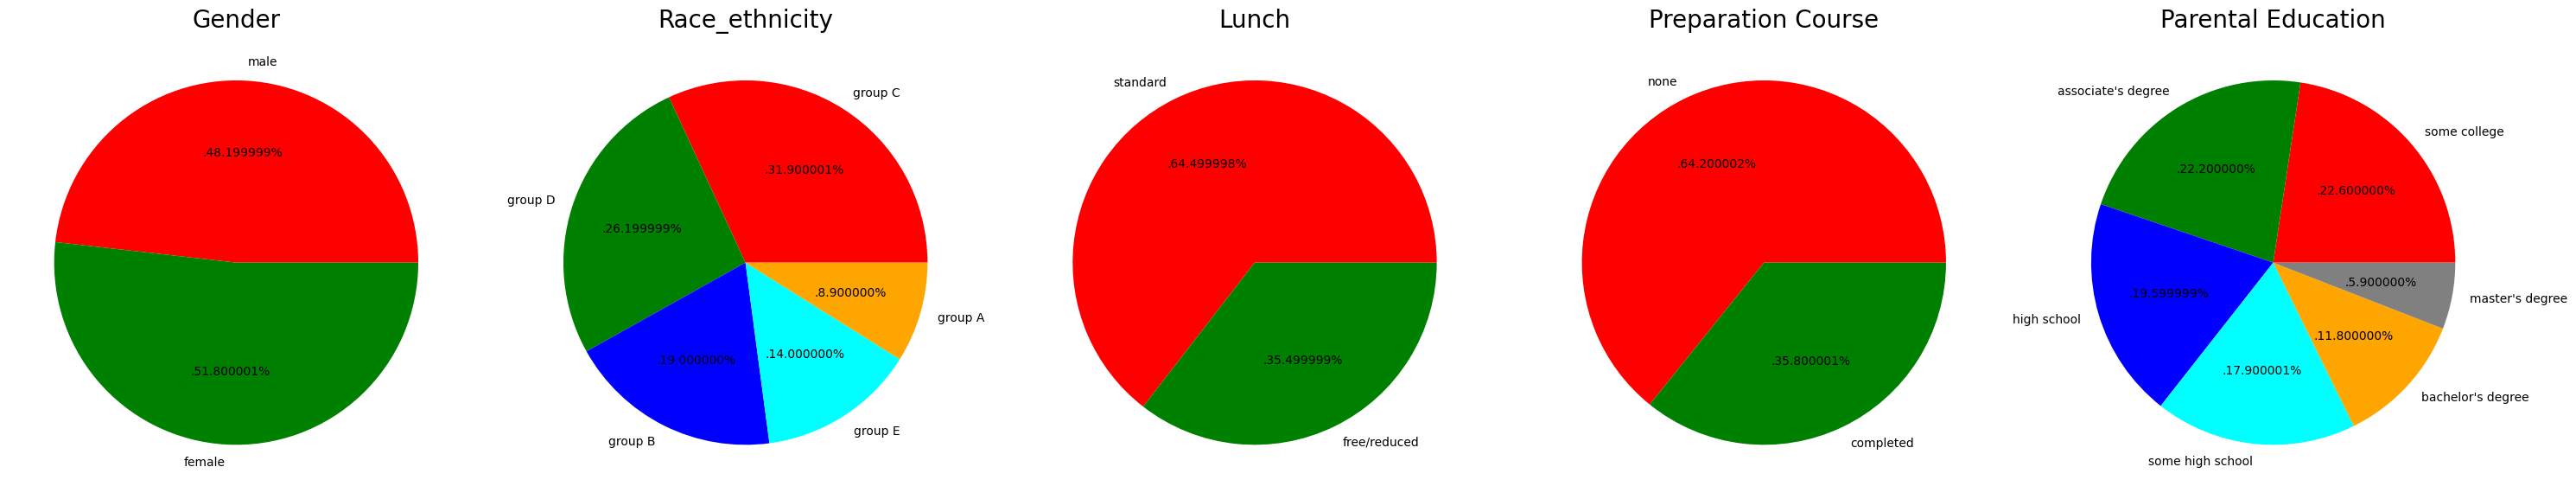

In [130]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()[['male', 'female']]
labels = size.index #'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')




plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = size.index 
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race_ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
Label = size.index
color = ['red', 'green']

plt.pie(size, colors = color, labels = Label, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
Label = size.index
color = ['red', 'green']

plt.pie(size, colors = color, labels = Label, autopct = '.%2f%%')
plt.title('Preparation Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
Label= size.index
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors = color, labels = Label, autopct = '.%2f%%')
plt.title("Parental Education", fontsize = 20)
plt.axis('off')

#adjust spacing between subplots
plt.tight_layout()
plt.grid()         #toggle grid


plt.show()

### Insights

* Number of Male and Female student is almost the same
* Number of student are greater in group C
* Number of students who have a standard lunch is greater
* Number of student who did not enroll for a preparation course is greater
* Number of student who's parents have "some college" is the greatest followed close by students who's parents have some "associate's degree"

## 4.4 Feature Wise Visualization
### 4.4.1 Gender Column
* How is distribution of Gender?
* Does gender impact the students performance?

### UNNIVARIATE ANALYSIS- How is distribution of Gender?

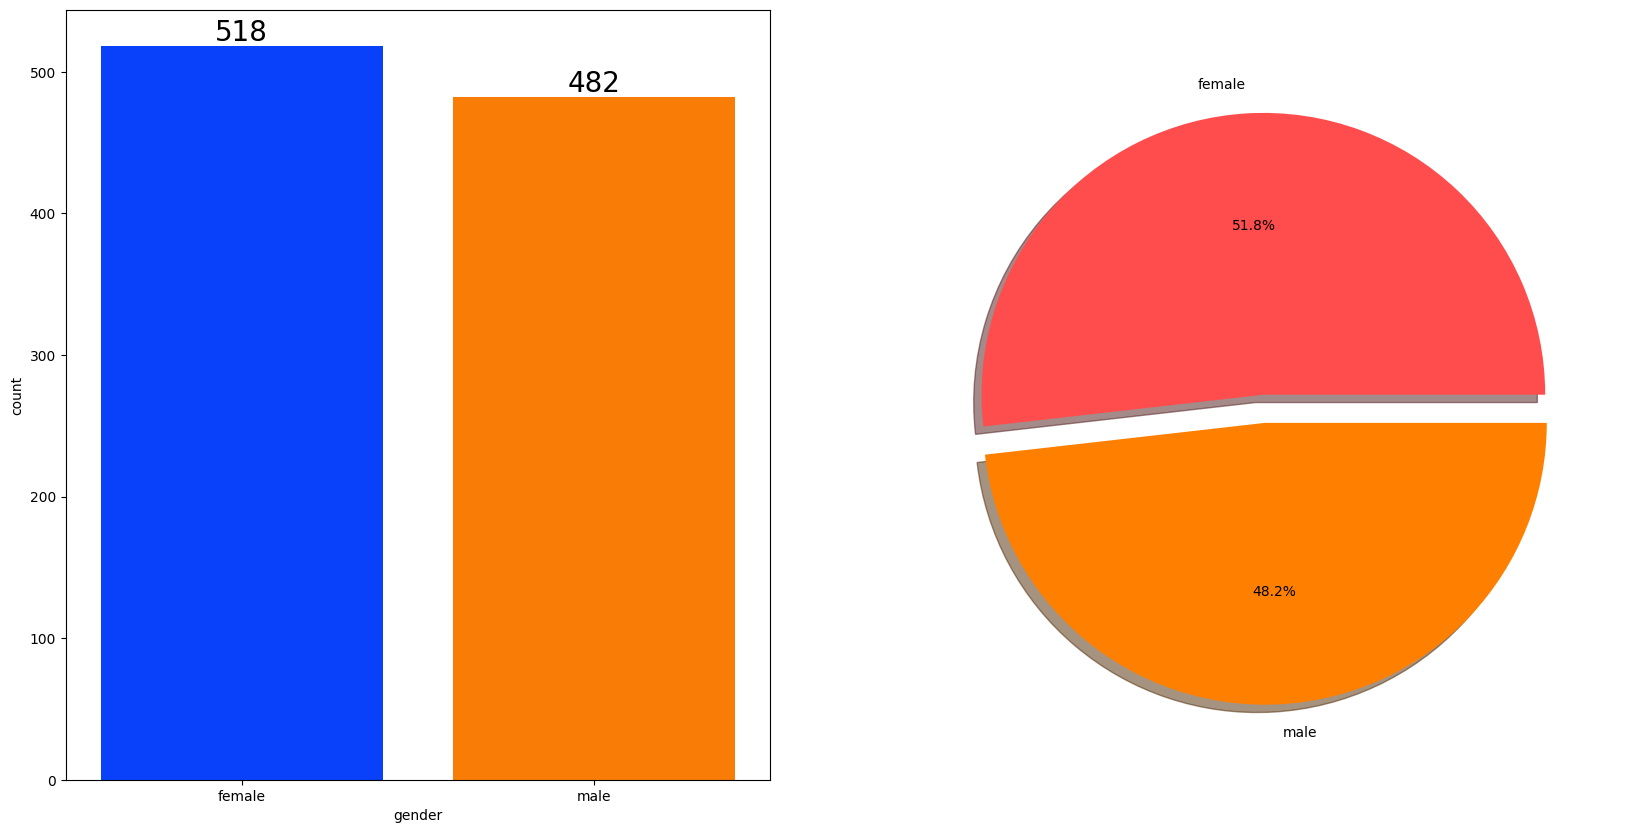

In [138]:
f, ax= plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(x=df['gender'], data= df, palette = 'bright', ax=ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size =20)

x=df['gender'].value_counts()
plt.pie(x, labels = x.index, explode = [0, 0.1], autopct = '%1.1f%%', shadow = True, colors = ['#ff4d4d', '#ff8000'])
plt.show()

### Insights
* Gender has balanced data, with a number of 518 female students (52%) and a number of 482 male students (48%) 

### BIVARIATE ANALYSIS (Is gender has any impact on student's performance?)

In [156]:
numeric_columns = df.select_dtypes(include=['number'])
gender_group = df.groupby('gender')[numeric_columns.columns].mean()

print(gender_group)

        math_score  reading_score  writing_score  total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


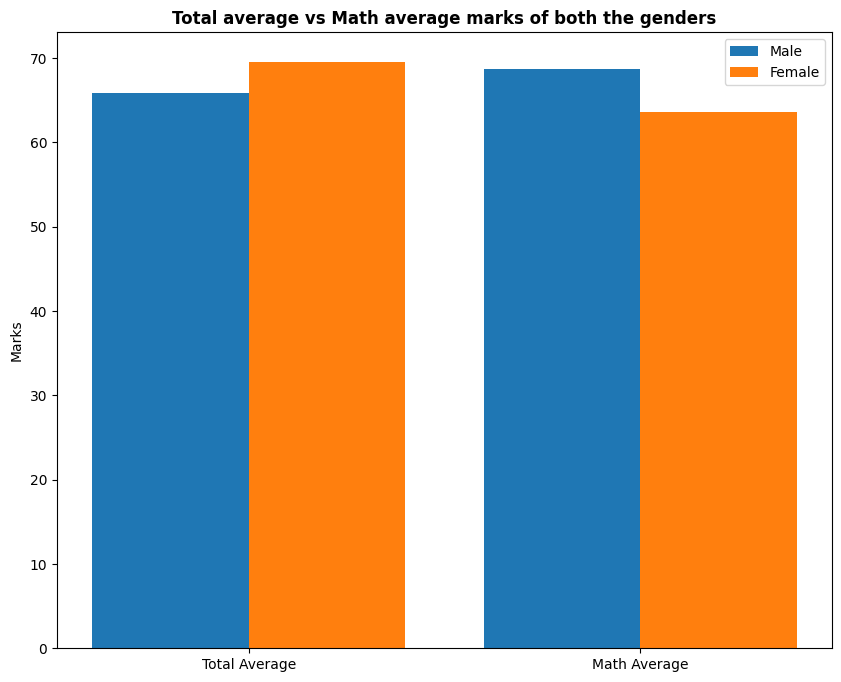

In [157]:

plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group["average"][1], gender_group['math_score'][1]]

x_axis = np.arange(len(X))

plt.bar(x_axis - 0.2, male_scores, .4, label = 'Male')
plt.bar(x_axis + .2, female_scores, .4, label = 'Female')

plt.xticks(x_axis, X)
plt.ylabel('Marks')
plt.title('Total average vs Math average marks of both the genders', fontweight='bold')
plt.legend()
plt.show()

### Insights
* On an average females have a better overall score than men
* whereas males have scored higher in Maths

### 4.4.2 Race_Enthicity Column
* How is Group wise distribution?
* Does Race_ethnicity have any impact on student's performance?

### UNIVARIATE ANALYSIS- How is Group wise distribution?

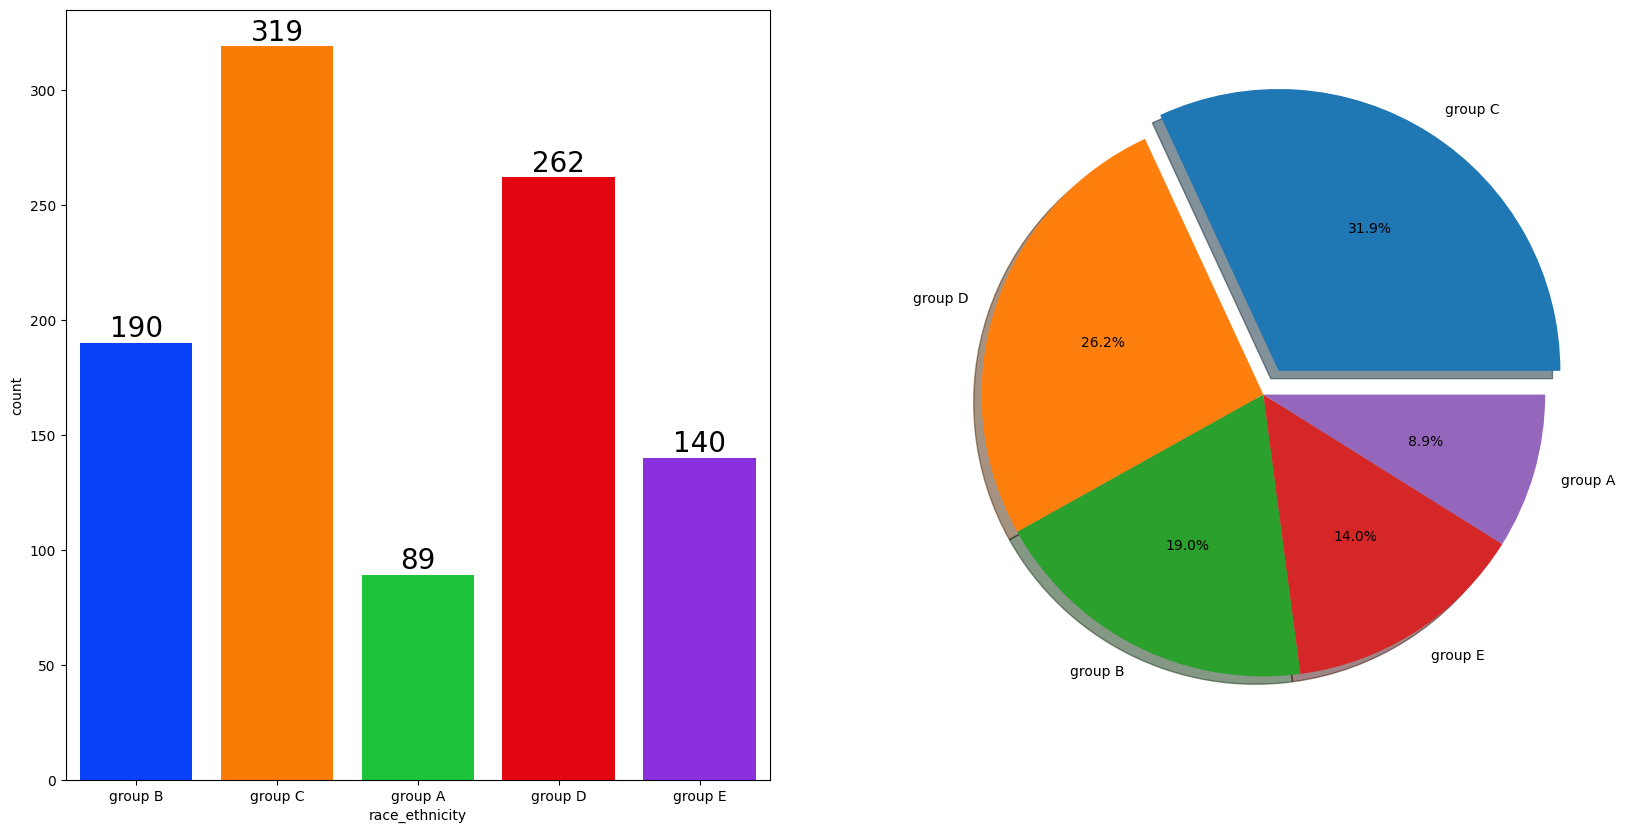

In [159]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(x=df['race_ethnicity'], data=df, palette = 'bright', ax = ax[0], saturation=.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x = df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode= [.1, 0, 0, 0, 0], autopct= '%1.1f%%', shadow = True)
plt.show()

### Insights
* Most of the students belong to group C and D
* And a lower number of student belong to group A

### BIVARIATE ANALYSIS- Is Race_Ethnicity any impact on student's performance?

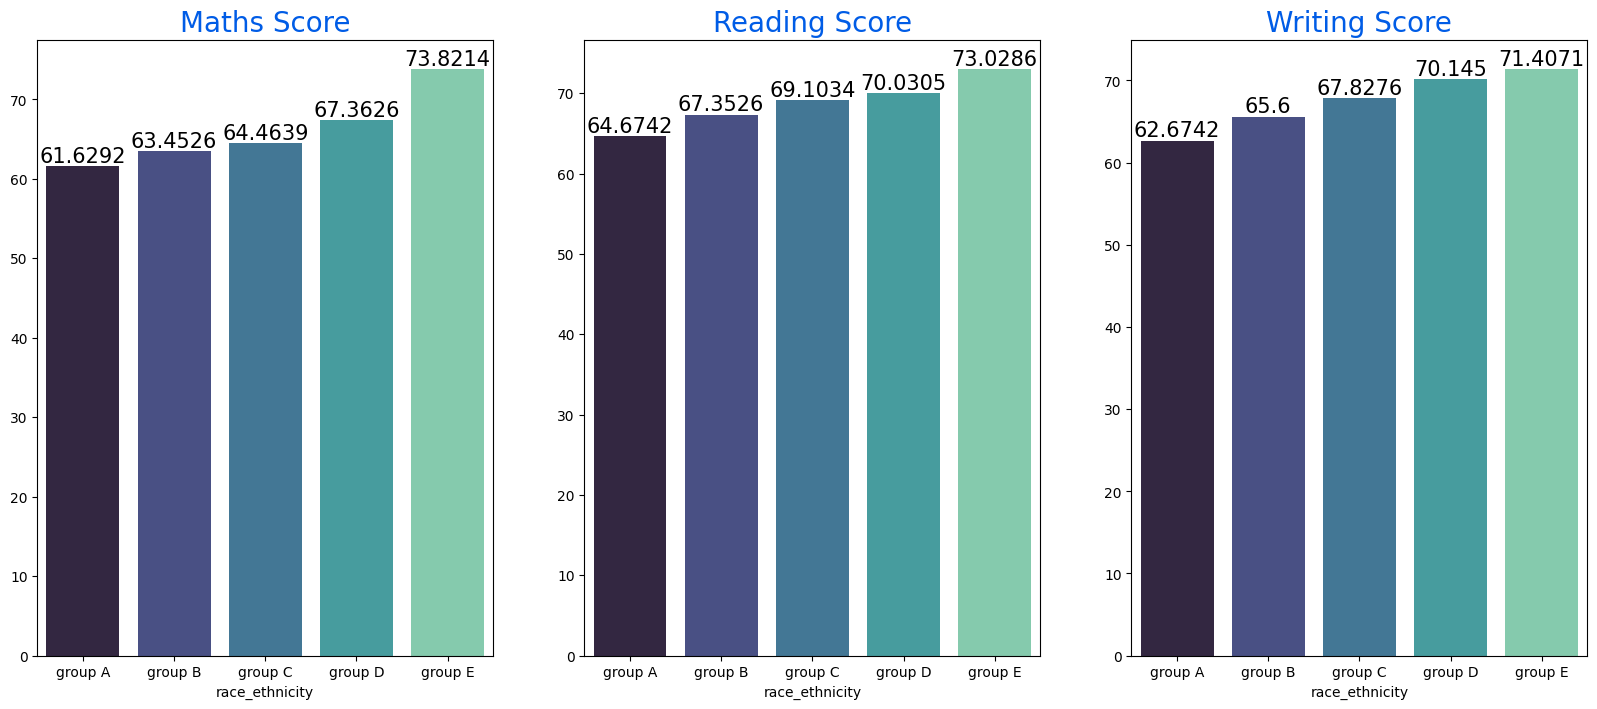

In [165]:
Group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize= (20, 8))
sns.barplot(x= Group_data2['math_score'].mean().index, y = Group_data2['math_score'].mean().values, palette= 'mako', ax=ax[0])
ax[0].set_title('Maths Score', color='#005ce6', size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x= Group_data2['reading_score'].mean().index, y = Group_data2['reading_score'].mean().values, palette= 'mako', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x= Group_data2['writing_score'].mean().index, y = Group_data2['writing_score'].mean().values, palette= 'mako', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

### Insights
* Group E students have scored the hightest marks
* Group A students have scored the lowest marks
* Students from a lower Sociioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
* What is educational background of the student's parents?
* Deos parental education havr any impact of the student's performance?

### UNIVARIATE ANALYSIS- What educational background of the parents?

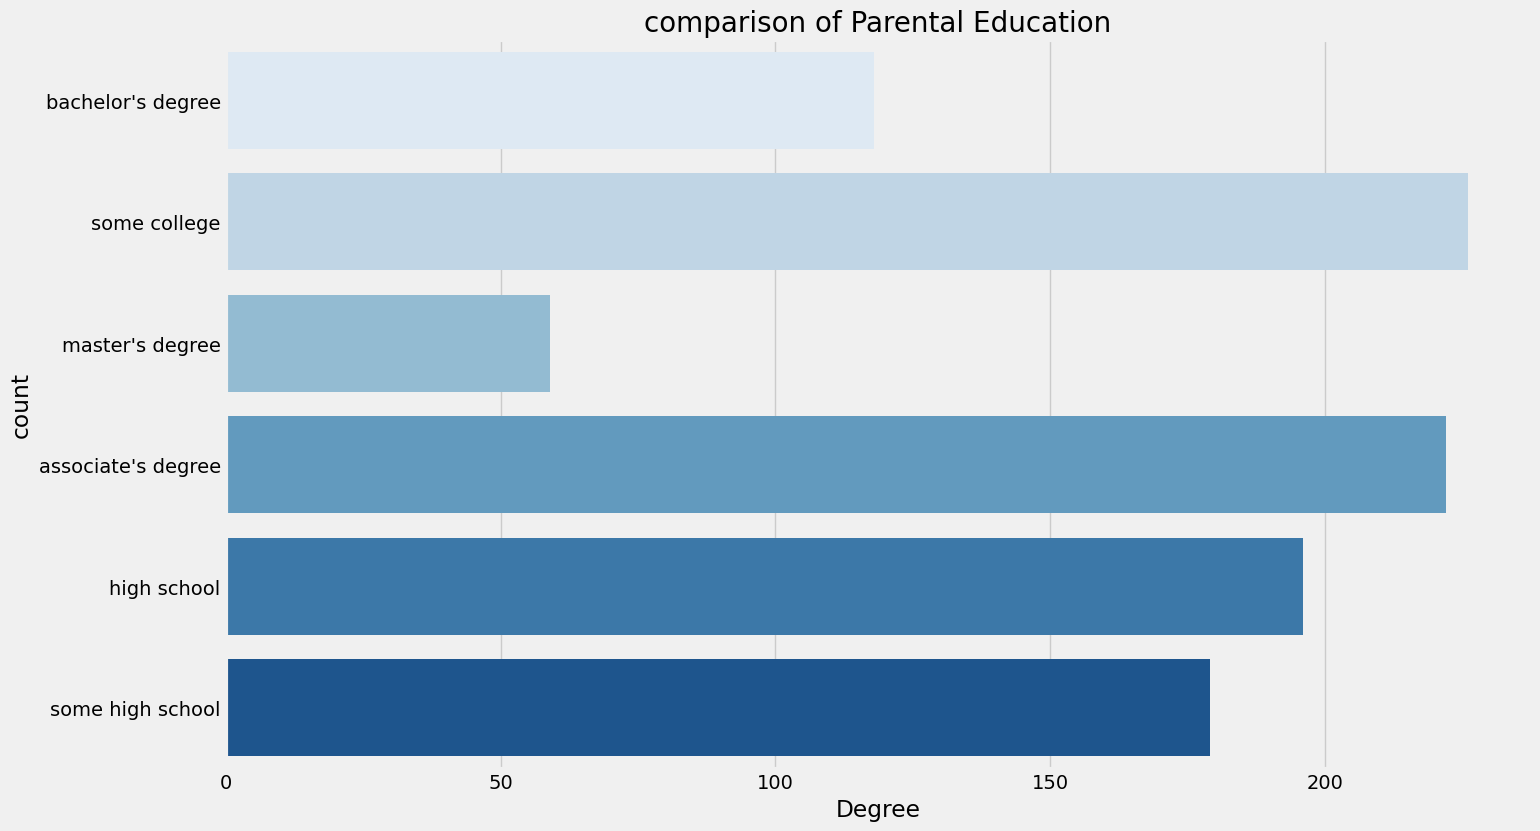

In [166]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights
* Largest number of parents are from some college

### BIVARIATE ANALYSIS- Is parental education has any impact on student's performance?

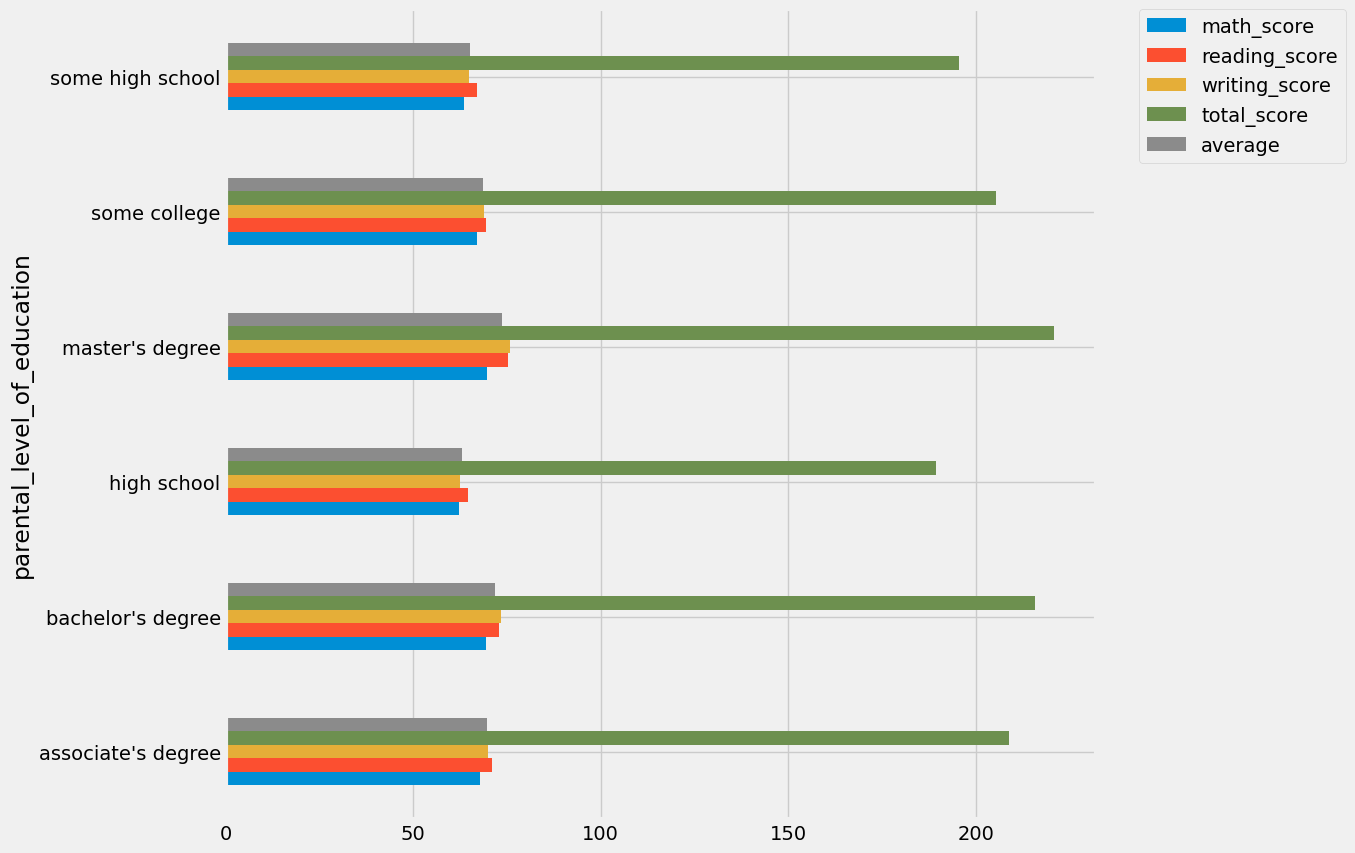

In [169]:
# Select only numeric columns for calculating the mean
numeric_columns = df.select_dtypes(include='number')

# Group by 'parental_level_of_education' and calculate the mean for numeric columns
group_data3 = df.groupby('parental_level_of_education')[numeric_columns.columns].mean()

# Plot the horizontal bar chart
group_data3.plot(kind='barh', figsize=(10, 10))

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.show()


### removing the total_score data for the above graph

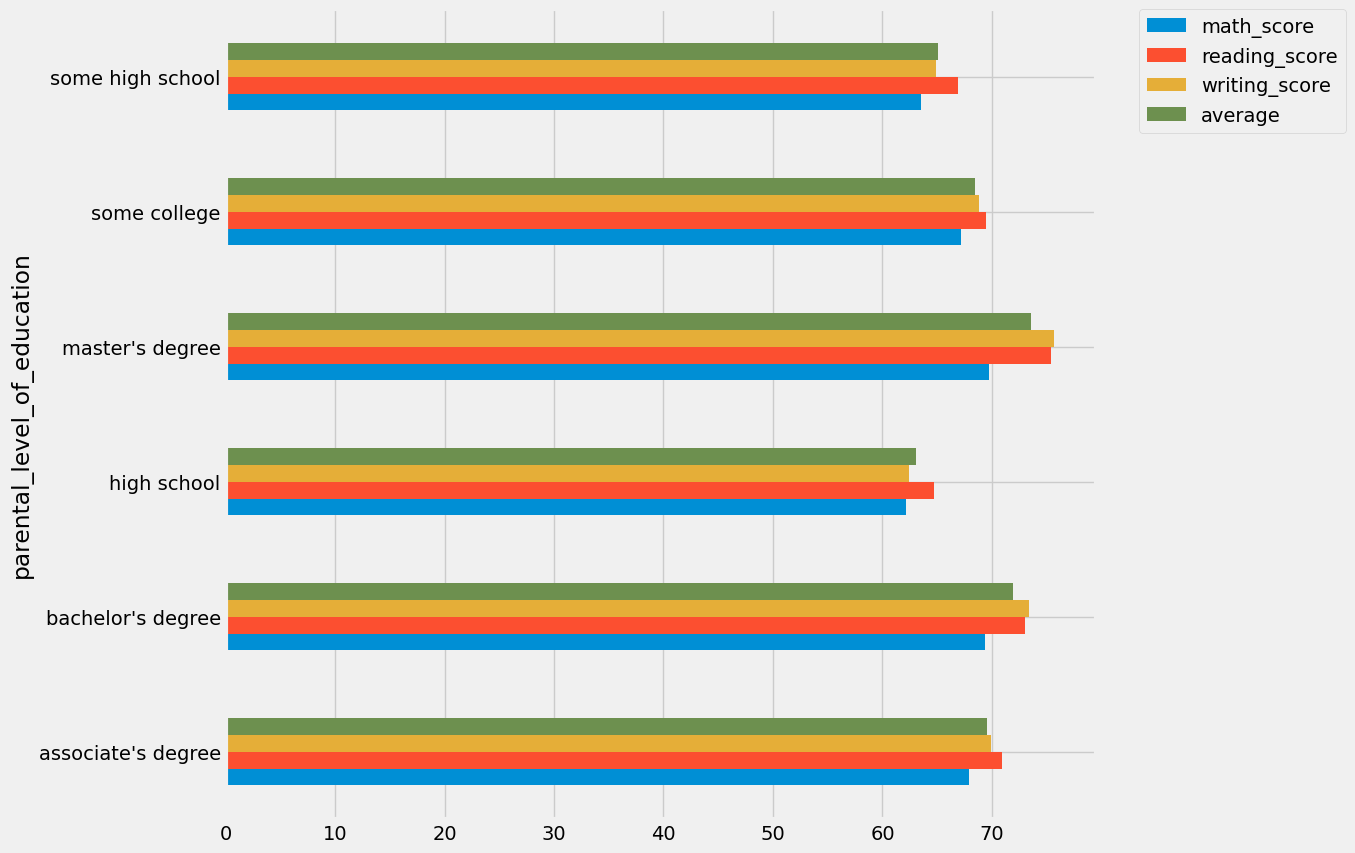

In [170]:
# Select only numeric columns for calculating the mean
numeric_columns = df.select_dtypes(include='number')

# Group by 'parental_level_of_education' and calculate the mean for numeric columns
group_data = df.groupby('parental_level_of_education')[numeric_columns.columns].mean()

# Temporarily drop the 'total_score' column for this specific graph
group_data_without_total_score = group_data.drop(columns=['total_score'])

# Plot the horizontal bar chart
group_data_without_total_score.plot(kind='barh', figsize=(10, 10))

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.show()


### insights
* The score of students whose parents possess master and bachelor level of education have higher marks than others

### 4.4.4 LUNCH COLUMN
* Which type of lunch is most common amoung students?
* What is the effect of lunch types on test results?

### UNIVARIATE ANALYSIS- Which type of lunch is most common amoung students?

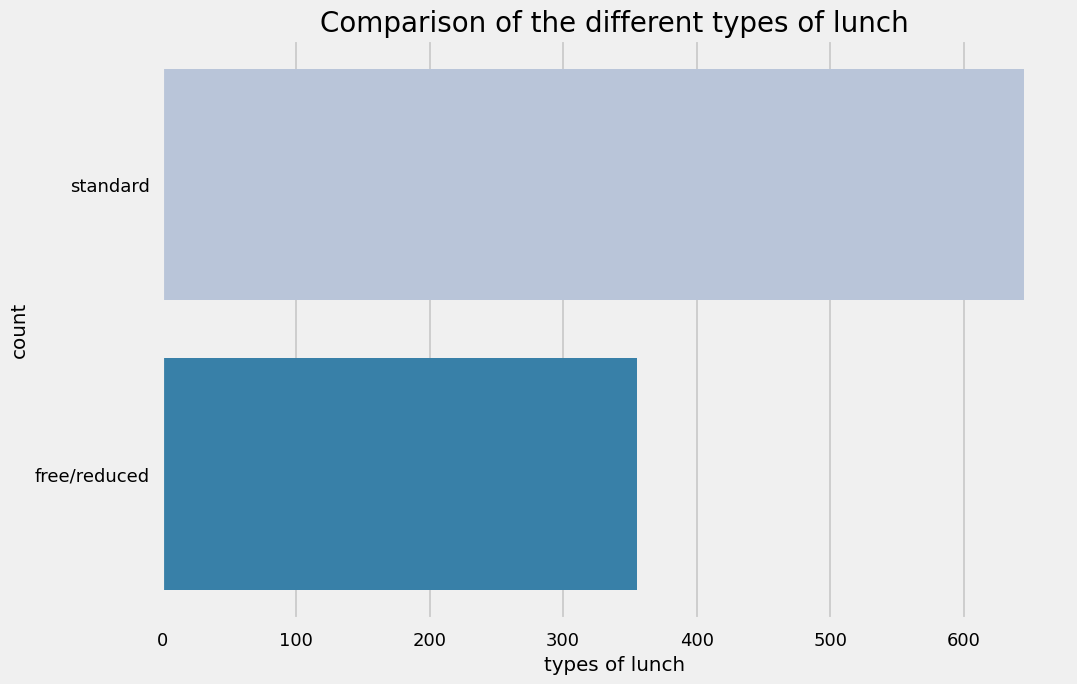

In [172]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of the different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Iinsights
* Students who served Standard lunch were more than free lunch

### BIVARIATE ANALYSIS- Does lunch type have an impact on the students performance?

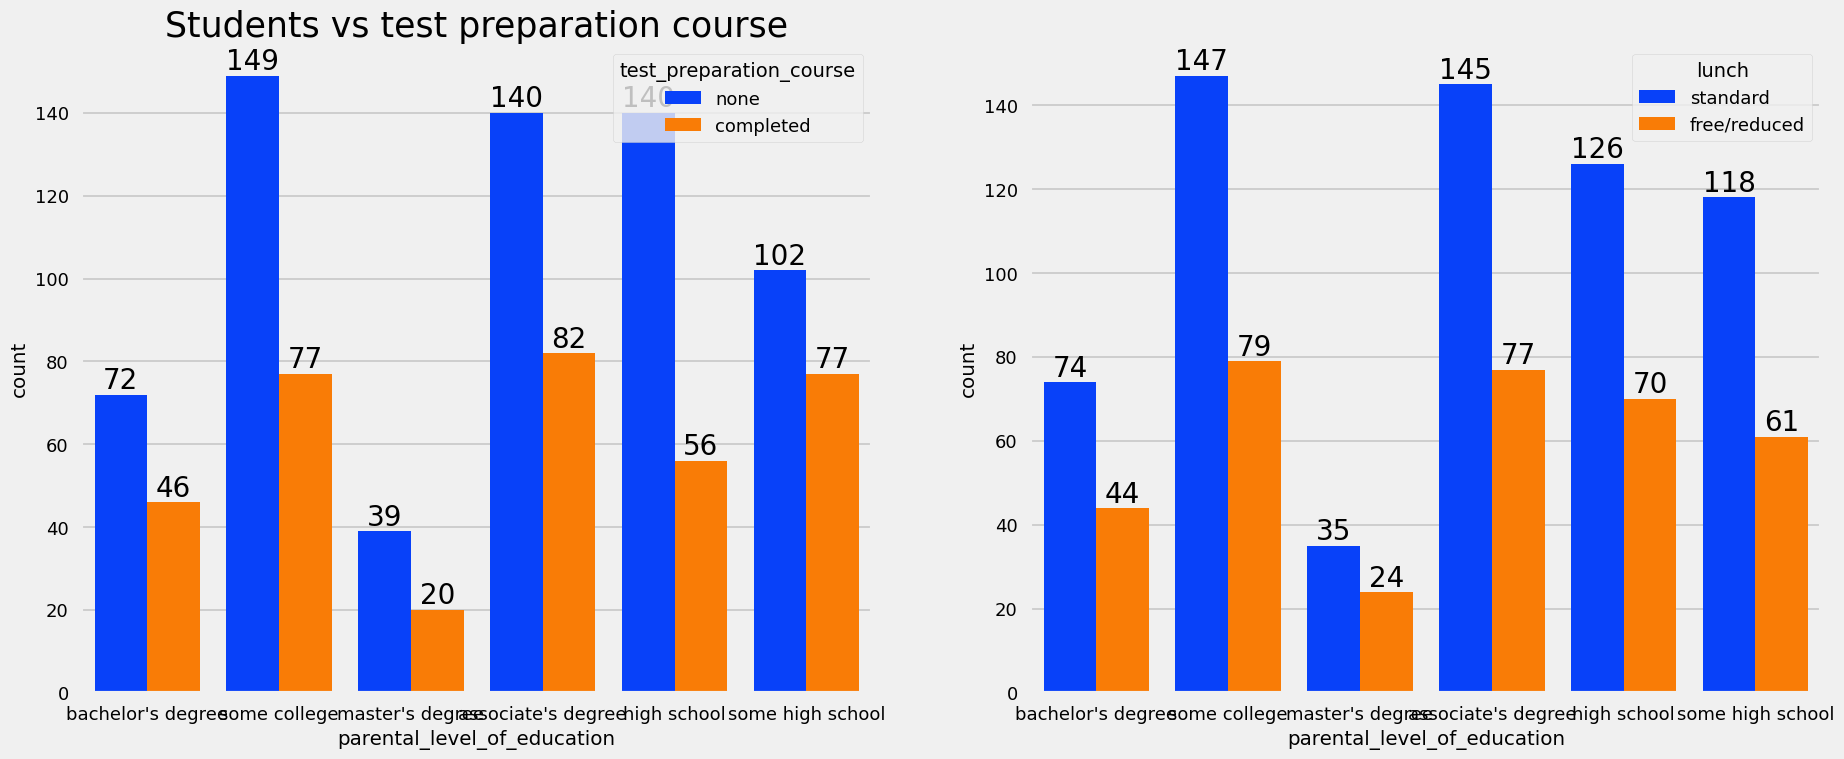

In [174]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.countplot(x = df['parental_level_of_education'], data = df, palette = 'bright', hue = 'test_preparation_course', saturation = .95, ax = ax[0])
ax[0].set_title('Students vs test preparation course', color= 'black', size = 25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size = 20)

sns.countplot(x = df['parental_level_of_education'], data = df, palette = 'bright', hue = 'lunch', saturation = .95, ax = ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size = 20)

### insight
* Students who get stanard Lunch tend to perform better than student who get free/reduced lunch

### 4.4.5 Test Preparation Course Column
* Does test prepration course have any impact on the students performance?

### BIVARIATE ANALYSIS- Is test prepration course befenifiate to the student?


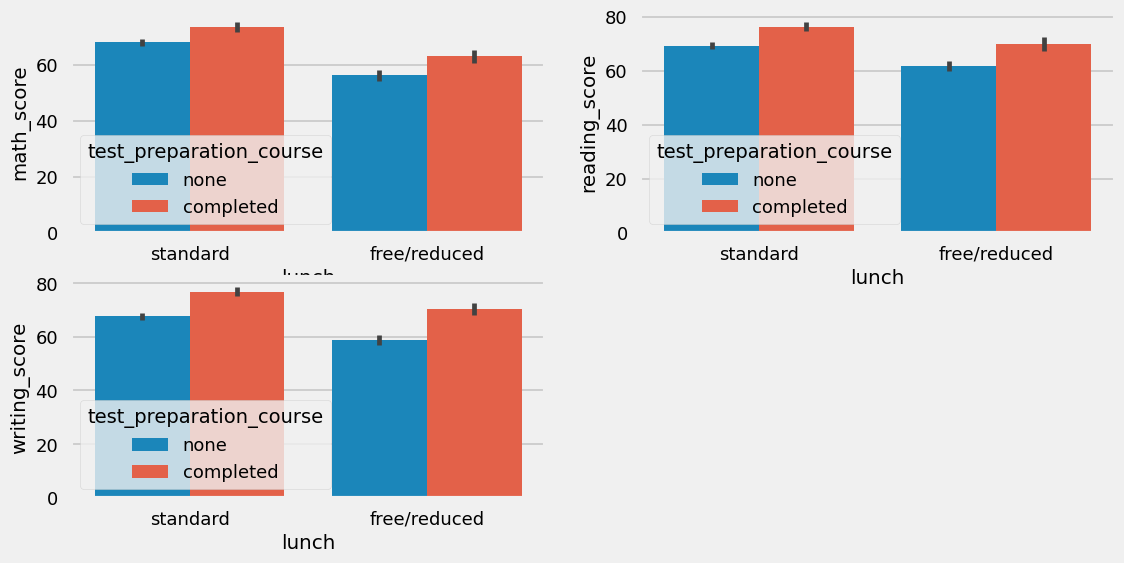

In [176]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x = df['lunch'], y = df['math_score'], hue = df['test_preparation_course'])
plt.subplot(2, 2, 2)
sns.barplot(x = df['lunch'], y = df['reading_score'], hue = df['test_preparation_course'])
plt.subplot(2, 2, 3)
sns.barplot(x = df['lunch'], y = df['writing_score'], hue = df['test_preparation_course'])
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 Check OUTLIERS

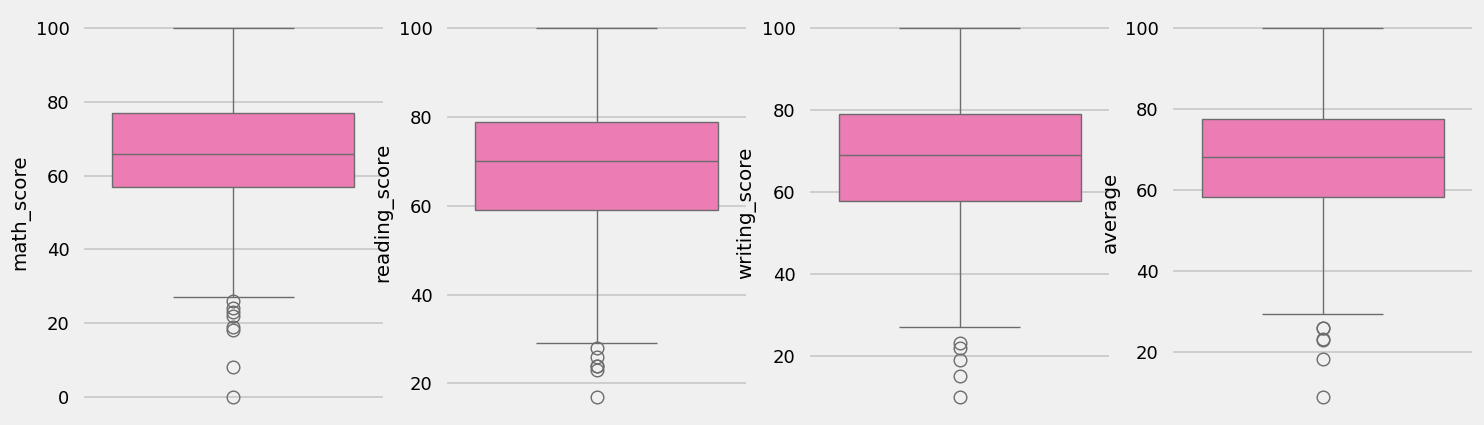

In [177]:
plt.subplots(1, 4, figsize = (16, 5))
plt.subplot(141)
sns.boxplot(df['math_score'], color = 'hotpink')
plt.subplot(142)
sns.boxplot(df['reading_score'], color = 'hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color = 'hotpink')
plt.subplot(144)
sns.boxplot(df['average'], color = 'hotpink')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

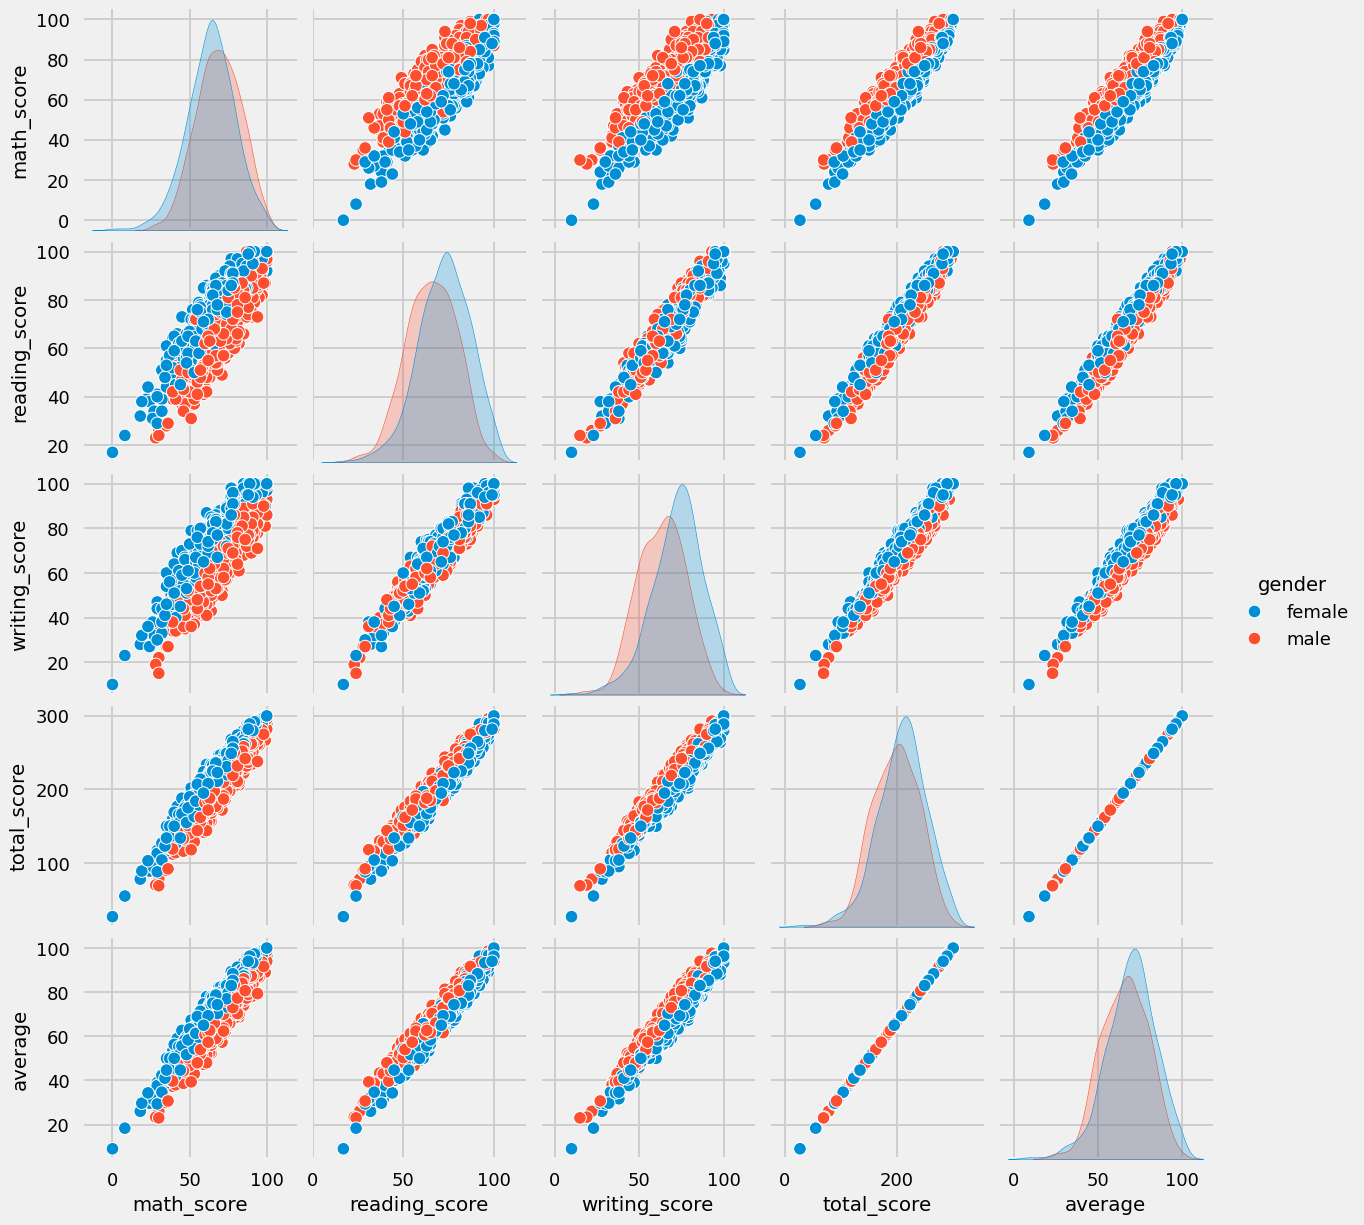

In [178]:
sns.pairplot(df, hue = 'gender')
plt.show()

#### Insights
* From the above plot it is clear that all the scores increase linearly with each other

### 5. Conclusions
* Student's Performance is related with lunch, race, parental lvel of education
* Females lead in pass percentages and also they are the top-scorers
* Student's performances is not much related with test preparation course
* Finishing preparation coirse is benefitial